In [18]:
import pandas as pd
import plotly.express as px
import os
from scipy.stats import norm
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

In [19]:
pd.set_option('display.max_rows', 300)

In [20]:
# Create the directory if it doesn't exist

if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    
output_directory = "analysis_images"


In [21]:
#import .csvs
reg_season_wins = pd.read_csv('nfl_reg_season_win_loss_records_2011_to_2022.csv')
playoff_wins = pd.read_csv('nfl_playoff_win_loss_records_2011_to_2022.csv')
superbowl_wins = pd.read_csv('Super_Bowl_Winners.csv')
player_salaries = pd.read_csv('nfl_salaries_2011-2022.csv')

In [22]:
player_salaries

,index,year,team,name,position,cap_hit,cap_percentage
0,1,2011,arizona-cardinals,Larry Fitzgerald,WR,"$2,000,000",13.28
1,2,2011,arizona-cardinals,Levi Brown,LT,"$6,777,500",7.70
2,3,2011,arizona-cardinals,Adrian Wilson,S,"$3,500,000",6.17
3,4,2011,arizona-cardinals,Darnell Dockett,DE,"$2,350,000",4.58
4,5,2011,arizona-cardinals,Derek Anderson,QB,"$4,087,500",4.40
...,...,...,...,...,...,...,...
20663,20664,2022,washington-football-team,David Bada,DT,"$705,000",0.04
20664,20665,2022,washington-football-team,Nate Gerry,OLB,"$57,500",0.03
20665,20666,2022,washington-football-team,Jaret Patterson,RB,"$825,000",0.02
20666,20667,2022,washington-football-team,Alex Akingbulu,T,"$705,000",0.02


In [23]:
#clean and standardize data 

# Make cap % a float
player_salaries['cap_percentage'] = player_salaries['cap_percentage'].astype(float)

# clean and standardize team names 
def clean_team_name(team):
    # Special cases
    if team == 'new-york-giants':
        return 'NY Giants'
    elif team == 'new-york-jets':
        return 'NY Jets'
    elif team == 'los-angeles-rams':
        return 'LA Rams'
    elif team == 'los-angeles-chargers':
        return 'LA Chargers'
    else:
        parts = team.split('-')
    
    city_name = parts[:-1]
    if city_name[-1] == 'football':
        city_name = city_name[:-1]
    return ' '.join(word.title() for word in city_name)

player_salaries['team'] = player_salaries['team'].apply(clean_team_name)

# Standardize cap hit number so it can be manipulated as a number rather than string
player_salaries['cap_hit'] = player_salaries['cap_hit'].replace('-', '0', regex=True)            
player_salaries['cap_hit'] = player_salaries['cap_hit'].str.replace('$', '', regex=True).str.replace(',', '', regex=True).astype(float)

player_salaries


,index,year,team,name,position,cap_hit,cap_percentage
0,1,2011,Arizona,Larry Fitzgerald,WR,2000000.0,13.28
1,2,2011,Arizona,Levi Brown,LT,6777500.0,7.70
2,3,2011,Arizona,Adrian Wilson,S,3500000.0,6.17
3,4,2011,Arizona,Darnell Dockett,DE,2350000.0,4.58
4,5,2011,Arizona,Derek Anderson,QB,4087500.0,4.40
...,...,...,...,...,...,...,...
20663,20664,2022,Washington,David Bada,DT,705000.0,0.04
20664,20665,2022,Washington,Nate Gerry,OLB,57500.0,0.03
20665,20666,2022,Washington,Jaret Patterson,RB,825000.0,0.02
20666,20667,2022,Washington,Alex Akingbulu,T,705000.0,0.02


In [24]:
reg_season_wins.rename(columns={'Team': 'team', 'Year': 'year'}, inplace=True)

reg_season_wins

,year,team,Win,Loss,Tie
0,2011,Green Bay,15,1,0
1,2011,San Francisco,13,3,0
2,2011,New England,13,3,0
3,2011,New Orleans,13,3,0
4,2011,Baltimore,12,4,0
...,...,...,...,...,...
379,2022,LA Rams,5,12,0
380,2022,Indianapolis,4,12,1
381,2022,Arizona,4,13,0
382,2022,Houston,3,13,1


In [25]:
playoff_wins.drop(columns={'Loss', 'Tie'}, inplace=True)

playoff_wins.rename(columns={'Team': 'team', 'Year': 'year', 'Win': 'Playoff Wins'}, inplace=True)

playoff_wins

,year,team,Playoff Wins
0,2011,NY Giants,4
1,2011,New England,2
2,2011,Baltimore,1
3,2011,Houston,1
4,2011,Denver,1
5,2011,New Orleans,1
6,2011,San Francisco,1
7,2011,Green Bay,0
8,2011,Cincinnati,0
9,2011,Pittsburgh,0


In [26]:
superbowl_wins

,year,team,superbowl wins
0,2011,NY Giants,1
1,2012,Baltimore,1
2,2013,Seattle,1
3,2014,New England,1
4,2015,Denver,1
5,2016,New England,1
6,2017,Philadelphia,1
7,2018,New England,1
8,2019,Kansas City,1
9,2020,Tampa Bay,1


# First analysis: Grab the highest paid player (by percent of cap), bucket them into groups, and determine if theres correlation between the highest paid player and success

In [27]:

# Use groupby with idxmax to get the index of rows with the highest cap_percentage per year per team
idx = player_salaries.groupby(['year', 'team'])['cap_percentage'].idxmax()

# Filter the dataframe based on the index
highest_paid = player_salaries.loc[idx].reset_index(drop=True)

highest_paid

,index,year,team,name,position,cap_hit,cap_percentage
0,1,2011,Arizona,Larry Fitzgerald,WR,2000000.0,13.28
1,59,2011,Atlanta,Matt Ryan,QB,11250000.0,11.01
2,112,2011,Baltimore,Terrell Suggs,OLB,3400000.0,7.94
3,165,2011,Buffalo,Ryan Fitzpatrick,QB,3220000.0,4.02
4,215,2011,Carolina,Jordan Gross,LT,6000000.0,8.12
...,...,...,...,...,...,...,...
379,20406,2022,San Francisco,Jimmie Ward,FS,8900000.0,6.09
380,20459,2022,Seattle,Poona Ford,DE,7900000.0,4.64
381,20512,2022,Tampa Bay,Donovan Smith,LT,15750000.0,8.94
382,20565,2022,Tennessee,Derrick Henry,RB,4000000.0,4.44


In [28]:
# Plotting a histogram
fig_highest_paid = px.histogram(highest_paid, x='cap_percentage', nbins=50, title='highest_paid')
fig_highest_paid.show()

# Save the graph
file_path = os.path.join(output_directory, "Cap_Hit_for_Most_Expensive_Player")
fig_highest_paid.write_image(file_path, format='png')

In [29]:
# merge dataframes reg season wins losses with the player salaries df
salaries_with_reg_season_wins_df = pd.merge(highest_paid, reg_season_wins, on=['year', 'team'], how='inner')

salaries_with_reg_season_wins_df

,index,year,team,name,position,cap_hit,cap_percentage,Win,Loss,Tie
0,1,2011,Arizona,Larry Fitzgerald,WR,2000000.0,13.28,8,8,0
1,59,2011,Atlanta,Matt Ryan,QB,11250000.0,11.01,10,6,0
2,112,2011,Baltimore,Terrell Suggs,OLB,3400000.0,7.94,12,4,0
3,165,2011,Buffalo,Ryan Fitzpatrick,QB,3220000.0,4.02,6,10,0
4,215,2011,Carolina,Jordan Gross,LT,6000000.0,8.12,6,10,0
...,...,...,...,...,...,...,...,...,...,...
368,20406,2022,San Francisco,Jimmie Ward,FS,8900000.0,6.09,13,4,0
369,20459,2022,Seattle,Poona Ford,DE,7900000.0,4.64,9,8,0
370,20512,2022,Tampa Bay,Donovan Smith,LT,15750000.0,8.94,8,9,0
371,20565,2022,Tennessee,Derrick Henry,RB,4000000.0,4.44,7,10,0


In [30]:
# merge salaries_with_reg_season_wins_df with postseason wins
reg_and_postseason_wins_df = pd.merge(salaries_with_reg_season_wins_df, playoff_wins, on=['year', 'team'], how='left')

reg_and_postseason_wins_df['Playoff Wins'] = reg_and_postseason_wins_df['Playoff Wins'].fillna(0)

reg_and_postseason_wins_df



,index,year,team,name,position,cap_hit,cap_percentage,Win,Loss,Tie,Playoff Wins
0,1,2011,Arizona,Larry Fitzgerald,WR,2000000.0,13.28,8,8,0,0.0
1,59,2011,Atlanta,Matt Ryan,QB,11250000.0,11.01,10,6,0,0.0
2,112,2011,Baltimore,Terrell Suggs,OLB,3400000.0,7.94,12,4,0,1.0
3,165,2011,Buffalo,Ryan Fitzpatrick,QB,3220000.0,4.02,6,10,0,0.0
4,215,2011,Carolina,Jordan Gross,LT,6000000.0,8.12,6,10,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
368,20406,2022,San Francisco,Jimmie Ward,FS,8900000.0,6.09,13,4,0,2.0
369,20459,2022,Seattle,Poona Ford,DE,7900000.0,4.64,9,8,0,0.0
370,20512,2022,Tampa Bay,Donovan Smith,LT,15750000.0,8.94,8,9,0,0.0
371,20565,2022,Tennessee,Derrick Henry,RB,4000000.0,4.44,7,10,0,0.0


In [31]:
# merge reg_and_postseason_wins_df and superbowl wins
superbowl_wins.columns = ['year', 'team', 'Won Superbowl?']

# merge previous with superbowl wins
full_season_wins = pd.merge(reg_and_postseason_wins_df, superbowl_wins, on=['year', 'team'], how='left')

full_season_wins.fillna(0, inplace=True)

full_season_wins


,index,year,team,name,position,cap_hit,cap_percentage,Win,Loss,Tie,Playoff Wins,Won Superbowl?
0,1,2011,Arizona,Larry Fitzgerald,WR,2000000.0,13.28,8,8,0,0.0,0.0
1,59,2011,Atlanta,Matt Ryan,QB,11250000.0,11.01,10,6,0,0.0,0.0
2,112,2011,Baltimore,Terrell Suggs,OLB,3400000.0,7.94,12,4,0,1.0,0.0
3,165,2011,Buffalo,Ryan Fitzpatrick,QB,3220000.0,4.02,6,10,0,0.0,0.0
4,215,2011,Carolina,Jordan Gross,LT,6000000.0,8.12,6,10,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
368,20406,2022,San Francisco,Jimmie Ward,FS,8900000.0,6.09,13,4,0,2.0,0.0
369,20459,2022,Seattle,Poona Ford,DE,7900000.0,4.64,9,8,0,0.0,0.0
370,20512,2022,Tampa Bay,Donovan Smith,LT,15750000.0,8.94,8,9,0,0.0,0.0
371,20565,2022,Tennessee,Derrick Henry,RB,4000000.0,4.44,7,10,0,0.0,0.0


In [34]:
# plot cap percentage in relation to wins for the highest paid player on each team since 2011
fig_highest_paid_to_wins = px.scatter(full_season_wins, x='cap_percentage', y='Win', hover_data=['name', 'team', 'year'], trendline='ols', trendline_color_override="red", title='Win vs Cap Percentage of Highest Paid Player')
# Set custom x-axis title
fig_highest_paid_to_wins.update_xaxes(title_text="Percent of the cap the most expensive player takes")
fig_highest_paid_to_wins.show()

# Save the graph
file_path = os.path.join(output_directory, "Highest_Paid_to_wins")
fig_highest_paid_to_wins.write_image(file_path, format='png')



In [35]:
expensive_players = full_season_wins[full_season_wins['cap_percentage'] > 13]
total_playoff_wins = expensive_players['Playoff Wins'].sum()

print(f'There have been 49 seasons where a player has made more than 13% of a teams cap. This is a collection of the greatest NFL players of the past decade. But they have combined for only {total_playoff_wins} wins and 1 Superbowl win.')
expensive_players.head()


There have been 49 seasons where a player has made more than 13% of a teams cap. This is a collection of the greatest NFL players of the past decade. But they have combined for only 23.0 wins and 1 Superbowl win.


,index,year,team,name,position,cap_hit,cap_percentage,Win,Loss,Tie,Playoff Wins,Won Superbowl?
0,1,2011,Arizona,Larry Fitzgerald,WR,2000000.0,13.28,8,8,0,0.0,0.0
12,675,2011,Houston,Mario Williams,DE,13800000.0,13.46,10,6,0,1.0,0.0
13,731,2011,Indianapolis,Dwight Freeney,OLB,11420000.0,13.36,2,14,0,0.0,0.0
20,1364,2011,NY Jets,Mark Sanchez,QB,14225000.0,13.40,8,8,0,0.0,0.0
39,2355,2012,Denver,Peyton Manning,QB,18000000.0,14.93,13,3,0,0.0,0.0


In [38]:
# plot cap percentage in relation to wins for the highest paid player on 10-win teams since 2011
playoff_teams_df = full_season_wins.loc[full_season_wins['Win'] >= 10].reset_index(drop=True)


fig_highest_paid_to_playoff_wins = px.scatter(playoff_teams_df, x='cap_percentage', y='Playoff Wins', hover_data=['name', 'team', 'year'], title='Playoff Wins vs Cap Percentage')
# Update y-axis to display only whole numbers
max_val = playoff_teams_df['Playoff Wins'].max()
fig_highest_paid_to_playoff_wins.update_yaxes(tickvals=list(range(0, int(max_val) + 1, 1)))
fig_highest_paid_to_playoff_wins.show()

# Save the graph
file_path = os.path.join(output_directory, "fig_highest_paid_to_playoff_wins")
fig_highest_paid_to_playoff_wins.write_image(file_path, format='png')



# Depth of talent in relation to wins

In [39]:
# Create a new dataframe with number of players over a certain % of the cap
# 2% of the cap last year was just under 5 million dollars

# player_salaries.head(60)

# Filter players with cap_percentage over 2.0
players_over_2_percent = player_salaries[player_salaries['cap_percentage'] > 2.0]

# Group by year and team, then count players
players_over_2_percent_by_team = players_over_2_percent.groupby(['year', 'team']).size().reset_index(name='players_over_2%')

# Resetting the index for your desired format
players_over_2_percent_by_team.reset_index(inplace=True)
players_over_2_percent_by_team['index'] = players_over_2_percent_by_team.index + 3

players_over_2_percent_by_team.head(60)



,index,year,team,players_over_2%
0,3,2011,Arizona,12
1,4,2011,Atlanta,15
2,5,2011,Baltimore,13
3,6,2011,Buffalo,9
4,7,2011,Carolina,13
5,8,2011,Chicago,11
6,9,2011,Cincinnati,11
7,10,2011,Cleveland,13
8,11,2011,Dallas,8
9,12,2011,Denver,7


In [40]:
# players_over_2_percent_by_team

# Plotting a histogram
fig = px.histogram(players_over_2_percent_by_team, x='players_over_2%', nbins=50, title='Distribution of Salaries')
fig.show()





In [41]:
# merge dataframes

# merge salaries with reg season wins
roster_depth_with_reg_season_wins_df = pd.merge(players_over_2_percent_by_team, reg_season_wins, on=['year', 'team'], how='inner')

# merge previous with playoff wins
prev_and_postseason_wins_df = pd.merge(roster_depth_with_reg_season_wins_df, playoff_wins, on=['year', 'team'], how='left')

# merge previous with superbowl wins
roster_depth_and_full_season_wins = pd.merge(prev_and_postseason_wins_df, superbowl_wins, on=['year', 'team'], how='left')

roster_depth_and_full_season_wins[['Playoff Wins', 'Won Superbowl?']] = roster_depth_and_full_season_wins[['Playoff Wins', 'Won Superbowl?']].fillna(0)



roster_depth_and_full_season_wins.head(60)



,index,year,team,players_over_2%,Win,Loss,Tie,Playoff Wins,Won Superbowl?
0,3,2011,Arizona,12,8,8,0,0.0,0.0
1,4,2011,Atlanta,15,10,6,0,0.0,0.0
2,5,2011,Baltimore,13,12,4,0,1.0,0.0
3,6,2011,Buffalo,9,6,10,0,0.0,0.0
4,7,2011,Carolina,13,6,10,0,0.0,0.0
5,8,2011,Chicago,11,8,8,0,0.0,0.0
6,9,2011,Cincinnati,11,9,7,0,0.0,0.0
7,10,2011,Cleveland,13,4,12,0,0.0,0.0
8,11,2011,Dallas,8,8,8,0,0.0,0.0
9,12,2011,Denver,7,8,8,0,1.0,0.0


In [44]:
# plot roster depth in relation to wins for the highest paid player on each team since 2011

fig_wins_to_roster_depth = px.scatter(roster_depth_and_full_season_wins, x='players_over_2%', y='Win', hover_data=['team', 'year'], trendline='ols', trendline_color_override="red", title='Wins vs Roster Depth')
fig_wins_to_roster_depth.update_xaxes(title_text="Number of Players on Team Earning 2% of Cap or More")

fig_wins_to_roster_depth.show()

# Save the graph
file_path = os.path.join(output_directory, "fig_wins_to_roster_depth")
fig_wins_to_roster_depth.write_image(file_path, format='png')

# Analyze spending by Offense/Defense


In [45]:
# Define offensive and defensive positions
offensive_positions = ['WR', 'QB', 'LT', 'RB', 'C', 'RT', 'TE', 'G', 'FB']
defensive_positions = ['ILB', 'OLB', 'LB', 'CB', 'S', 'DE', 'DT']

# Map positions to categories
def map_to_category(pos):
    if pos in offensive_positions:
        return 'offense'
    elif pos in defensive_positions:
        return 'defense'
    else:
        return 'other'  # for any positions not listed in either list

player_salaries['category'] = player_salaries['position'].apply(map_to_category)

# Filter out rows that fall into the 'other' category (if any)
player_salaries = player_salaries[player_salaries['category'] != 'other']

# Group by year, team, and category, then sum up the cap_percentage values
offense_defense_spending = player_salaries.groupby(['year', 'team', 'category'])['cap_percentage'].sum().unstack().reset_index()

# Rename the columns
offense_defense_spending.columns.name = None  # remove the top-level category name
offense_defense_spending = offense_defense_spending.rename(columns={'offense': 'offense_spending', 'defense': 'defense_spending'})

offense_defense_spending

,year,team,defense_spending,offense_spending
0,2011,Arizona,37.21,49.88
1,2011,Atlanta,39.49,54.22
2,2011,Baltimore,45.99,35.33
3,2011,Buffalo,27.49,19.62
4,2011,Carolina,35.41,52.20
...,...,...,...,...
379,2022,San Francisco,30.87,32.70
380,2022,Seattle,21.81,26.36
381,2022,Tampa Bay,32.73,40.65
382,2022,Tennessee,15.33,16.62


In [46]:
# clean data and merge the offense/defense spending df with the wins/playoff wins/sb wins df


# merge salaries with reg season wins
offense_defense_spending_with_reg_season_wins_df = pd.merge(offense_defense_spending, reg_season_wins, on=['year', 'team'], how='inner')

# merge previous with playoff wins
prev_and_postseason_wins_df = pd.merge(offense_defense_spending_with_reg_season_wins_df, playoff_wins, on=['year', 'team'], how='left')

# merge previous with superbowl wins
offense_defense_spending_and_full_season_wins = pd.merge(prev_and_postseason_wins_df, superbowl_wins, on=['year', 'team'], how='left')

offense_defense_spending_and_full_season_wins[['Playoff Wins', 'Won Superbowl?']] = offense_defense_spending_and_full_season_wins[['Playoff Wins', 'Won Superbowl?']].fillna(0)

offense_defense_spending_and_full_season_wins



,year,team,defense_spending,offense_spending,Win,Loss,Tie,Playoff Wins,Won Superbowl?
0,2011,Arizona,37.21,49.88,8,8,0,0.0,0.0
1,2011,Atlanta,39.49,54.22,10,6,0,0.0,0.0
2,2011,Baltimore,45.99,35.33,12,4,0,1.0,0.0
3,2011,Buffalo,27.49,19.62,6,10,0,0.0,0.0
4,2011,Carolina,35.41,52.20,6,10,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
368,2022,San Francisco,30.87,32.70,13,4,0,2.0,0.0
369,2022,Seattle,21.81,26.36,9,8,0,0.0,0.0
370,2022,Tampa Bay,32.73,40.65,8,9,0,0.0,0.0
371,2022,Tennessee,15.33,16.62,7,10,0,0.0,0.0


In [48]:
df = offense_defense_spending_and_full_season_wins

# Create scatter plot
fig_offense_spending_to_wins = px.scatter(df, x="offense_spending", y="Win", hover_data=["team", "year"], 
                 title="Offensive Spending vs. Wins",
                 labels={"offense_spending": "Offensive Spending (%)", "Win": "Wins"},
                 trendline='ols', 
                 trendline_color_override="red",
                )

# Show plot
fig_offense_spending_to_wins.show()

# Save the graph
file_path = os.path.join(output_directory, "fig_offense_spending_to_wins")
fig_offense_spending_to_wins.write_image(file_path, format='png')

In [50]:

# Create scatter plot
fig_defense_spending_to_wins = px.scatter(df, x="defense_spending", y="Win", hover_data=["team", "year"], 
                 title="defense_spending vs. Wins",
                 labels={"defense_spending": "defense_spending (%)", "Win": "Wins"},
                 trendline='ols', 
                 trendline_color_override="red",
                )


# Show plot
fig_defense_spending_to_wins.show()

# Save the graph
file_path = os.path.join(output_directory, "fig_defense_spending_to_wins")
fig_defense_spending_to_wins.write_image(file_path, format='png')

In [52]:

playoff_teams_spending_df = offense_defense_spending_and_full_season_wins.loc[offense_defense_spending_and_full_season_wins['Playoff Wins'] >= 1].reset_index(drop=True)

df = playoff_teams_spending_df

# Create scatter plot
fig_offense_spending_to_playoff_wins = px.scatter(df, x="offense_spending", y="Playoff Wins", hover_data=["team", "year"], 
                 title="Offensive Spending vs. Playoff Wins",
                 labels={"offense_spending": "Offensive Spending (%)", "Playoff Wins": "Playoff Wins"},
                 trendline='ols', 
                 trendline_color_override="red",
                 height=500,
                 width= 800
                )

# Update y-axis to show only whole numbers
fig_offense_spending_to_playoff_wins.update_yaxes(dtick=1)

# Show plot
fig_offense_spending_to_playoff_wins.show()

# Save the graph
file_path = os.path.join(output_directory, "fig_offense_spending_to_playoff_wins")
fig_offense_spending_to_playoff_wins.write_image(file_path, format='png')

In [53]:
playoff_teams_spending_df = offense_defense_spending_and_full_season_wins.loc[offense_defense_spending_and_full_season_wins['Win'] >= 10].reset_index(drop=True)

df = playoff_teams_spending_df

# Create scatter plot
fig_defense_spending_to_playoff_wins = px.scatter(df, x="defense_spending", y="Playoff Wins", hover_data=["team", "year"], 
                 title="defense_spending vs. Playoff Wins",
                 labels={"defense_spending": "defense_spending (%)", "Playoff Wins": "Playoff Wins"},
                 trendline='ols', 
                 trendline_color_override="red",
                )

# Show plot
fig_defense_spending_to_playoff_wins.show()

# Save the graph
file_path = os.path.join(output_directory, "fig_defense_spending_to_playoff_wins")
fig_defense_spending_to_playoff_wins.write_image(file_path, format='png')

# Analyze spending by Position Group, Offense and Defense




In [54]:
# player_salaries

# Step 1: Mapping positions to groups
position_groups = {
    'C': 'Offensive_Line',
    'LT': 'Offensive_Line',
    'RT': 'Offensive_Line',
    'G': 'Offensive_Line',
    'WR': 'Receivers',
    'TE': 'Receivers',
    'RB': 'Running_Backs',
    'FB': 'Running_Backs',
    'S': 'Secondary',
    'CB': 'Secondary',
    'OLB': 'Linebackers',
    'ILB': 'Linebackers',
    'DT': 'Defensive_Line',
    'DE': 'Defensive_Line',
    'QB': 'QB'
}

# Map positions in the dataframe to their respective groups
player_salaries.loc[:, 'position_group'] = player_salaries['position'].map(position_groups)

# Step 2: Aggregate the data and Step 3: Calculate the average
grouped_player_salaries = (
    player_salaries.groupby(['year', 'team', 'position_group'])
    .agg(total_cap_percentage=('cap_percentage', 'sum'), 
         player_count=('position', 'size'))
    .reset_index()
)
grouped_player_salaries['avg_cap_percentage_per_player'] = grouped_player_salaries['total_cap_percentage'] / grouped_player_salaries['player_count']

# Step 4: Reshape the data
pivot_player_salaries = (
    grouped_player_salaries.pivot_table(index=['year', 'team'], 
                           columns='position_group', 
                           values='avg_cap_percentage_per_player')
    .reset_index()
)

pivot_player_salaries.columns.name = None  # Removing the name of columns for cleanliness

# Displaying the result
pivot_player_salaries.head(60)



/var/folders/2c/tr3ggy4904g5pqdkqt7wqyym0000gn/T/ipykernel_95650/3712174247.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,team,Defensive_Line,Linebackers,Offensive_Line,QB,Receivers,Running_Backs,Secondary
0,2011,Arizona,1.300000,1.105000,2.200000,2.125000,1.856364,0.560000,1.768000
1,2011,Atlanta,1.395000,2.017778,1.486667,6.770000,2.136667,1.614000,1.565000
2,2011,Baltimore,1.996000,1.710000,2.151429,2.430000,1.303333,0.920000,1.282727
3,2011,Buffalo,1.361000,1.095000,0.542500,2.905000,0.595000,0.880000,1.398000
4,2011,Carolina,1.172727,1.241000,2.273000,1.480000,1.345833,2.220000,1.548333
5,2011,Chicago,1.151000,1.154000,1.211250,3.875000,1.032000,0.692000,1.278571
6,2011,Cincinnati,1.351000,1.388000,2.116250,1.090000,0.725000,1.326667,1.709000
7,2011,Cleveland,0.990000,1.112000,3.130000,1.255000,1.057000,0.400000,1.685000
8,2011,Dallas,0.946250,1.363333,0.854286,2.480000,1.158000,0.485000,2.313333
9,2011,Denver,0.859000,2.798571,0.872222,0.960000,0.501111,0.700000,1.950000


In [55]:
# Join with wins and losses
pivot_player_salaries

with_reg_season_wins_df = pd.merge(pivot_player_salaries, reg_season_wins, on=['year', 'team'], how='inner')

# merge with playoff wins
position_spending_total_wins = pd.merge(with_reg_season_wins_df, playoff_wins, on=['year', 'team'], how='left')

# normalize the NANs
position_spending_total_wins['Playoff Wins'].fillna(0, inplace=True)


position_spending_total_wins

,year,team,Defensive_Line,Linebackers,Offensive_Line,QB,Receivers,Running_Backs,Secondary,Win,Loss,Tie,Playoff Wins
0,2011,Arizona,1.300000,1.105000,2.200000,2.125000,1.856364,0.560000,1.768000,8,8,0,0.0
1,2011,Atlanta,1.395000,2.017778,1.486667,6.770000,2.136667,1.614000,1.565000,10,6,0,0.0
2,2011,Baltimore,1.996000,1.710000,2.151429,2.430000,1.303333,0.920000,1.282727,12,4,0,1.0
3,2011,Buffalo,1.361000,1.095000,0.542500,2.905000,0.595000,0.880000,1.398000,6,10,0,0.0
4,2011,Carolina,1.172727,1.241000,2.273000,1.480000,1.345833,2.220000,1.548333,6,10,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2022,San Francisco,1.891000,2.250000,1.948333,2.273333,1.271111,0.550000,0.698333,13,4,0,2.0
369,2022,Seattle,1.295000,1.172500,1.170000,1.140000,1.381250,0.625000,0.416667,9,8,0,0.0
370,2022,Tampa Bay,1.010000,3.400000,2.037143,2.493333,1.401818,0.872500,1.187778,8,9,0,0.0
371,2022,Tennessee,1.078750,0.318000,0.295000,0.255000,0.974444,1.245000,0.502000,7,10,0,0.0


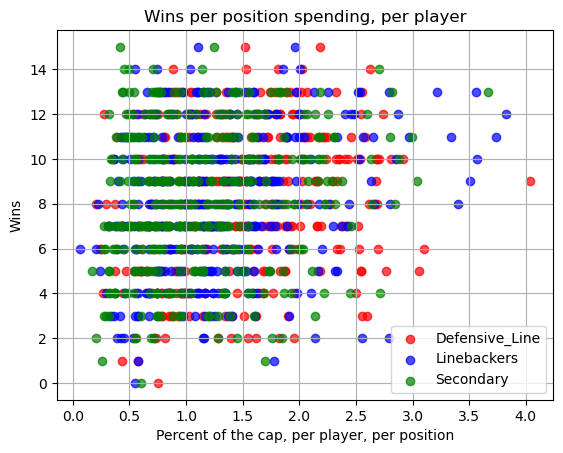

In [62]:
# Calculate the percentage for each team based on position columns

df = position_spending_total_wins

defense_columns = ['Defensive_Line', 'Linebackers', 'Secondary']
defense_colors = ['red', 'blue', 'green']

# Plotting each position_column separately with its color
for position, color in zip(defense_columns, defense_colors):
    plt.scatter(df[position], df['Win'], c=color, label=position, alpha=0.7)

plt.xlabel('Percent of the cap, per player, per position')
plt.ylabel('Wins')
plt.title('Wins per position spending, per player')
plt.grid(True)
plt.legend()

# Save the graph
plt.savefig(os.path.join(output_directory, "wins_per_position_per_player_chart.png"))

plt.show()




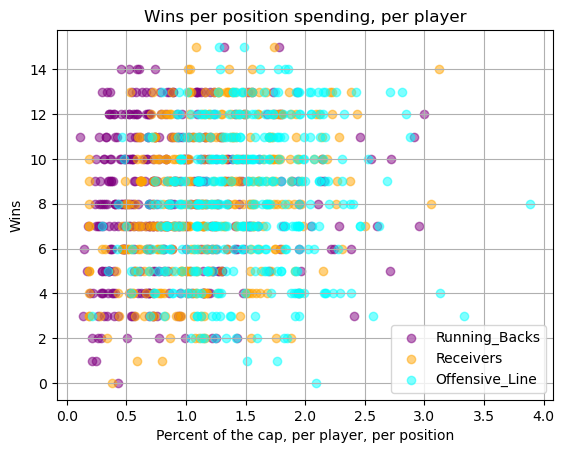

In [63]:
# Calculate the percentage for each team based on offensive columns

offense_columns = ['Running_Backs', 'Receivers', 'Offensive_Line' ]
offense_colors = ['purple', 'orange', 'cyan']

# Plotting each position_column separately with its color
for position, color in zip(offense_columns, offense_colors):
    plt.scatter(df[position], df['Win'], c=color, label=position, alpha=0.5)

plt.xlabel('Percent of the cap, per player, per position')
plt.ylabel('Wins')
plt.title('Wins per position spending, per player')
plt.grid(True)
plt.legend()

# Save the graph
plt.savefig(os.path.join(output_directory, "wins_per_position_per_player_chart_offense.png"))


plt.show()

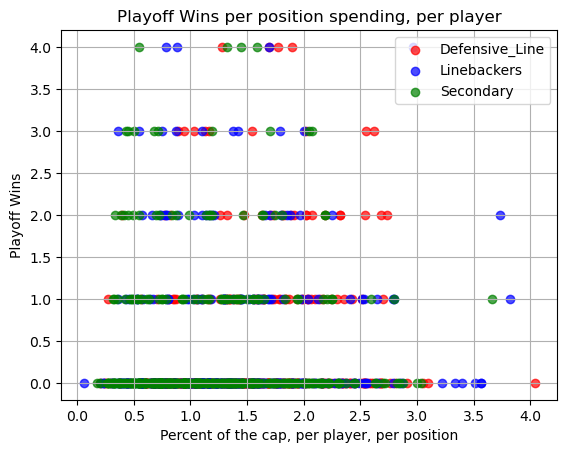

In [64]:
# Plotting each position_column separately with its color for playoff wins
for position, color in zip(defense_columns, defense_colors):
    plt.scatter(df[position], df['Playoff Wins'], c=color, label=position, alpha=0.7)

plt.xlabel('Percent of the cap, per player, per position')
plt.ylabel('Playoff Wins')
plt.title('Playoff Wins per position spending, per player')
plt.grid(True)
plt.legend()

# Save the graph
plt.savefig(os.path.join(output_directory, "Playoff_wins_per_position_per_player_chart_defense.png"))


plt.show()

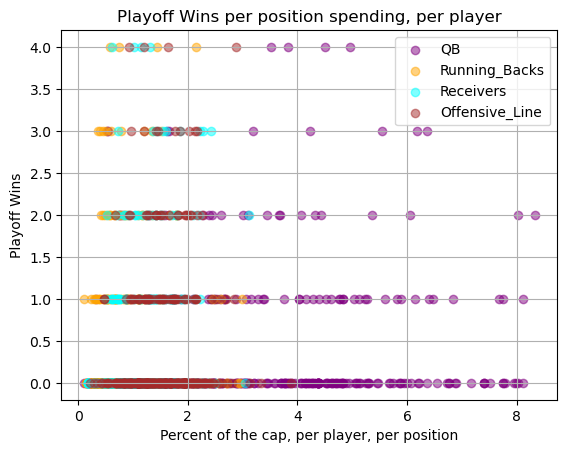

In [56]:
# Calculate the percentage for each team based on offensive columns
offense_columns = ['QB','Running_Backs', 'Receivers', 'Offensive_Line' ]
offense_colors = ['purple', 'orange', 'cyan', 'brown']

# Plotting each position_column separately with its color
for position, color in zip(offense_columns, offense_colors):
    plt.scatter(df[position], df['Playoff Wins'], c=color, label=position, alpha=0.5)

plt.xlabel('Percent of the cap, per player, per position')
plt.ylabel('Playoff Wins')
plt.title('Playoff Wins per position spending, per player')
plt.grid(True)
plt.legend()

# Save the graph
plt.savefig(os.path.join(output_directory, "Playoff_wins_per_position_per_player_chart_o.png"))

plt.show()